In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
x = np.arange(58.1, 71.96, 0.05)
y = np.array([12,10,16,18,13,14,15,21,26,16,16,16,15,15,31,22,23,22,23,31,31,36,29,30,44,43,45,39,67,67,62,83,79,92,93,128,177,187,251,289,334,414,509,549,623,680,751,769,816,742,701,721,599,540,498,425,339,293,212,172,157,142,115,95,84,86,81,78,58,47,52,62,47,44,39,44,50,34,28,36,36,28,34,24,28,28,37,40,33,45,44,32,32,47,41,46,41,56,46,50,59,71,72,63,62,77,89,62,93,96,114,97,123,140,137,146,138,187,213,219,239,255,287,314,336,386,401,434,467,499,534,635,597,588,597,671,725,693,751,759,727,758,763,720,706,655,650,595,608,565,522,511,433,499,448,387,371,365,324,312,326,306,292,266,282,238,265,278,242,209,226,254,236,233,232,225,220,205,209,234,214,234,234,205,194,223,201,226,214,234,241,226,269,272,303,261,272,277,284,308,324,286,307,329,281,280,257,227,239,234,221,181,195,190,164,158,131,118,118,106,108,70,104,74,76,70,52,57,56,36,44,40,48,40,33,23,28,25,24,20,20,24,31,19,23,24,15,18,12,14,11,14,14,21,20,14,12,10,11,13,5,14,11,10,11,8,8,6,10,5,11,13,8,14,6,8,3,7])

In [3]:
y += 5

https://stackoverflow.com/questions/77807226/scipy-optimize-curve-fit-does-not-fit-properly

In [4]:
def _1_PseudoVoigt(x, alpha,amp,cen,sigma):
    return (1-alpha)*amp*(1/(sigma*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen)/sigma)**2))) + \
            alpha*amp/np.pi*(sigma/((x-cen)**2+sigma**2))

def _PseudoVoigt(x, alpha1,amp1,cen1,sigma1,alpha2,amp2,cen2,sigma2,alpha3,amp3,cen3,sigma3):
    return _1_PseudoVoigt(x,alpha1,amp1,cen1,sigma1) + _1_PseudoVoigt(x,alpha2,amp2,cen2,sigma2) + \
            _1_PseudoVoigt(x,alpha3,amp3,cen3,sigma3)


In [5]:
bounds_min = [0,0,60,0, 0,0,64,0, 0.5,0,68,0]
bounds_max = [1,np.inf,62,1, 1,np.inf,66,1, 1,np.inf,69,1]

alpha1,amp1,cen1,sigma1 = 0.5,600,60.4,1
alpha2,amp2,cen2,sigma2 = 0.5,1000,64.9,1
alpha3,amp3,cen3,sigma3 = 0.5,350,68.3,0.7
b = 1

In [6]:
popt, pcov = optimize.curve_fit(
    _PseudoVoigt, x, y,
    #p0=[alpha1,amp1,cen1,sigma1,alpha2,amp2,cen2,sigma2,b2,alpha3,amp3,cen3,sigma3,b3],
    bounds=(bounds_min,bounds_max)
)

In [7]:
popt

array([5.49823107e-01, 7.15286093e+02, 6.04950407e+01, 3.23731301e-01,
       7.01996336e-01, 1.55471070e+03, 6.51233394e+01, 7.25610258e-01,
       5.00000000e-01, 6.45366139e+02, 6.80000000e+01, 8.73897305e-01])

In [8]:
np.sqrt(np.diag(pcov))

array([5.01163424e-02, 1.26069597e+01, 3.64848218e-03, 4.42521710e-03,
       4.30877122e-02, 3.12902078e+01, 6.65618181e-03, 9.13675237e-03,
       1.17566527e-01, 3.20780860e+01, 2.07159942e-02, 2.55981456e-02])

In [9]:
xlin = np.linspace(x.min(), x.max(), 500)
yhat = _PseudoVoigt(xlin, *popt)

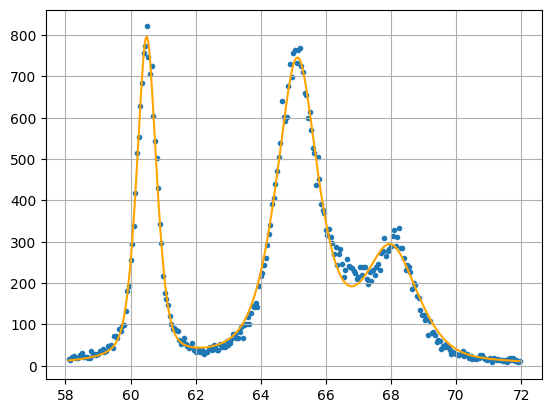

In [13]:
fig, axe = plt.subplots()
axe.scatter(x, y, marker=".")
axe.plot(xlin, yhat, color="orange")
#axe.plot(xlin, _1_PseudoVoigt(xlin, *popt[0:4]))
#axe.plot(xlin, _1_PseudoVoigt(xlin, *popt[4:8]))
#axe.plot(xlin, _1_PseudoVoigt(xlin, *popt[8:12]))
axe.grid()